In [1]:
import time
import datetime
principio = datetime.datetime.now()
principio

datetime.datetime(2024, 1, 8, 20, 34, 7, 456651)

In [11]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
import seaborn as sns
from sktime.transformations.series.boxcox import LogTransformer
from sktime.transformations.series.difference import Differencer
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import r2_score



# Read Data
data = pd.read_csv('../data/datos semanales.csv')
data.set_index('Fecha', inplace=True)
# transformer = LogTransformer()
data.index = pd.to_datetime(data.index)
# log_data = transformer.fit_transform(data)
data

,Billetes
Fecha,
2013-01-12,62614
2013-01-19,59301
2013-01-26,56391
2013-02-02,62981
2013-02-09,65258
...,...
2016-12-03,163841
2016-12-10,127511
2016-12-17,162260


In [13]:
y = data.astype('float64').to_period('W-Sat')
y

,Billetes
Fecha,
2013-01-06/2013-01-12,62614.0
2013-01-13/2013-01-19,59301.0
2013-01-20/2013-01-26,56391.0
2013-01-27/2013-02-02,62981.0
2013-02-03/2013-02-09,65258.0
...,...
2016-11-27/2016-12-03,163841.0
2016-12-04/2016-12-10,127511.0
2016-12-11/2016-12-17,162260.0


In [16]:
y_train, y_test = temporal_train_test_split(y, test_size=5)
# log_y_train, log_y_test = temporal_train_test_split(y = log_data.astype('float64').to_period('w'), test_size=5)

In [17]:
y_train

,Billetes
2013-01-06/2013-01-12,62614.0
2013-01-13/2013-01-19,59301.0
2013-01-20/2013-01-26,56391.0
2013-01-27/2013-02-02,62981.0
2013-02-03/2013-02-09,65258.0
...,...
2016-10-23/2016-10-29,279404.0
2016-10-30/2016-11-05,183583.0
2016-11-06/2016-11-12,184902.0
2016-11-13/2016-11-19,178948.0


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:>)

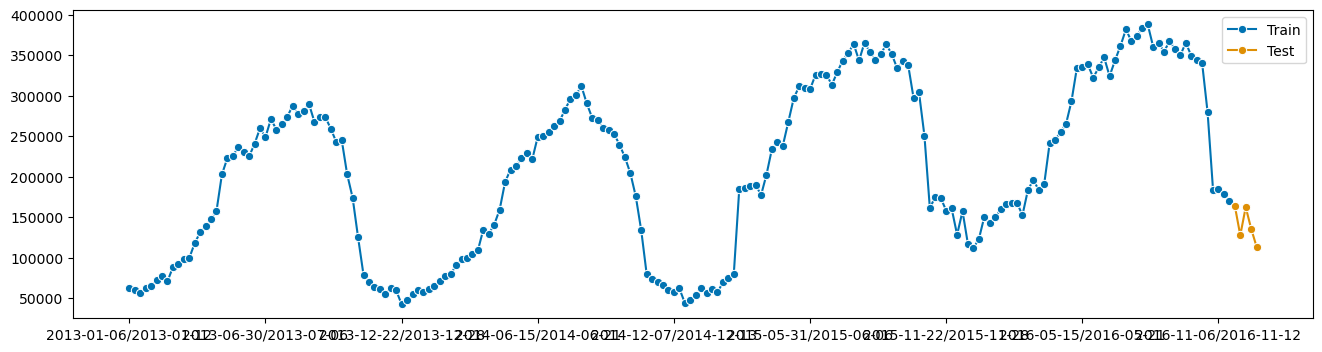

In [18]:
plot_series(y_train, y_test, labels=["Train", "Test"])

In [ ]:
fh = np.arange(len(y_test)) + 1

Ahora sin log

Moldelo elegido: Parameters: (True, False, 'aic', 'mse', 52), MAPE: 0.050223996299127306

In [ ]:
forecaster = AutoARIMA(
        seasonal=True,
        stationary=False,
        information_criterion='aic',
        scoring='mse',
        sp=52,
        suppress_warnings=True)
forecaster.fit(y_train)

In [ ]:
y_train

In [ ]:
fh = np.arange(len(y_test)) + 1  # forecasting horizon
y_pred = forecaster.predict(fh)

In [ ]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train["2016-10":], np.exp(y_pred),y_test, labels=["Billetes", "Billetes pred", "Billetes REAL"])

In [ ]:
y_train

In [ ]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2013 -2021
plot_series(y_train["2016-10":], y_pred, y_test, labels=["Billetes", "Billetes pred", "Billetes REAL"])

In [ ]:
mape = mean_absolute_percentage_error(y_test[0:4], y_pred[0:4])
mse = MeanSquaredError()
mse = mse(y_test[0:4], y_pred[0:4])
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

In [ ]:
final = datetime.datetime.now()
duracion = final-principio
print(principio)
print(final)
print(duracion)